### HOMEWORK

### 1. Download and load the data. Perform the initial exploration and cleaning.
   - it is already split into training and testing parts
   - labels go from 0 to 76
   - checks should include e.g.:
     - checking data types, number of texts,
     - plotting the class distribution
     - plotting the histogram of text lengths

### Load Data

#### Check data types, number of texts

In [56]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt


df_train = load_dataset("PolyAI/banking77")["train"].to_pandas()
df_test  = load_dataset("PolyAI/banking77")["test"].to_pandas()

In [57]:
print("Train shape:", df_train.shape)
print("Test shape :", df_test.shape)

Train shape: (10003, 2)
Test shape : (3080, 2)


--

In [58]:
print("Data types:")
display(df_train.dtypes)
display(df_test.dtypes)

Data types:


text     object
label     int64
dtype: object

text     object
label     int64
dtype: object

In [59]:
print("First rows:")
display(df_train.head(10))

First rows:


,text,label
0,I am still waiting on my card?,11
1,What can I do if my card still hasn't arrived ...,11
2,I have been waiting over a week. Is the card s...,11
3,Can I track my card while it is in the process...,11
4,"How do I know if I will get my card, or if it ...",11
5,When did you send me my new card?,11
6,Do you have info about the card on delivery?,11
7,What do I do if I still have not received my n...,11
8,Does the package with my card have tracking?,11
9,I ordered my card but it still isn't here,11


In [60]:
print("Last rows:")
display(df_train.tail(10))

Last rows:


,text,label
9993,can I use it all over the world?,24
9994,Do you work in Greece?,24
9995,What countries do your accounts support?,24
9996,I live in the US and I would like to get a car...,24
9997,I just moved to the US how do I get a card?,24
9998,You provide support in what countries?,24
9999,What countries are you supporting?,24
10000,What countries are getting support?,24
10001,Are cards available in the EU?,24
10002,Which countries are represented?,24


In [61]:
df_train["text_length"] = df_train["text"].str.len()
df_test["text_length"]  = df_test["text"].str.len()
print("text length describe (train):")
print(df_train["text_length"].describe())

text length describe (train):
count    10003.000000
mean        59.473758
std         40.867901
min         13.000000
25%         36.000000
50%         47.000000
75%         64.000000
max        433.000000
Name: text_length, dtype: float64


In [62]:
print("label range (train):")
print("min label:", df_train["label"].min())
print("max label:", df_train["label"].max())

label range (train):
min label: 0
max label: 76


In [63]:
print("Missing values (train):")
print(df_train.isna().sum())

print("missing values (test):")
print(df_test.isna().sum())



Missing values (train):
text           0
label          0
text_length    0
dtype: int64
missing values (test):
text           0
label          0
text_length    0
dtype: int64


In [64]:
df_train["text"] = df_train["text"].astype(str).str.strip()
df_test["text"]  = df_test["text"].astype(str).str.strip()

df_train = df_train[df_train["text"].str.len() > 0].reset_index(drop=True)
df_test  = df_test[df_test["text"].str.len() > 0].reset_index(drop=True)

print("\nPo czyszczeniu:")
print("Train shape:", df_train.shape)
print("Test shape :", df_test.shape)


Po czyszczeniu:
Train shape: (10003, 3)
Test shape : (3080, 3)


#### plotting the histogram of text lengths

<Axes: title={'center': 'Train lengths'}, ylabel='Frequency'>

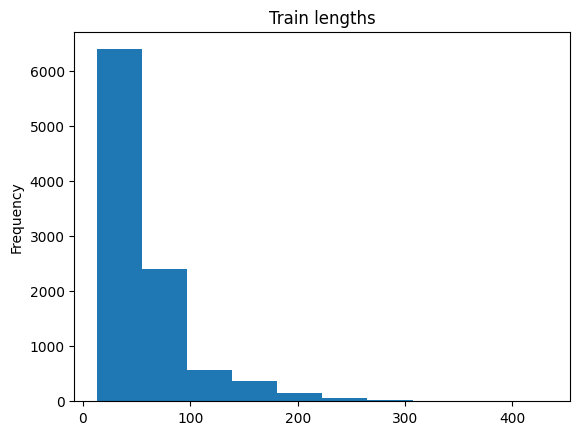

In [65]:
df_train["text"].str.len().plot.hist(title="Train lengths")

<Axes: title={'center': 'Test lengths'}, ylabel='Frequency'>

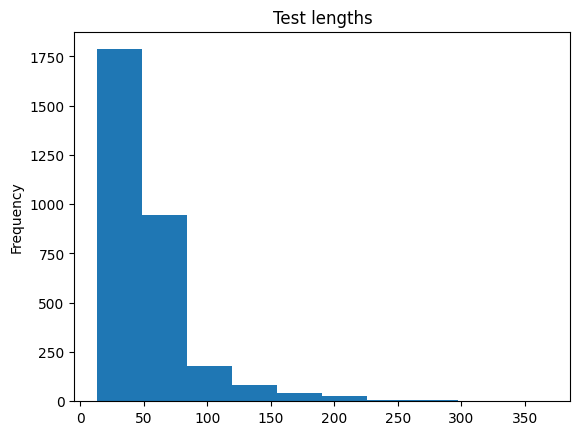

In [66]:
df_test["text"].str.len().plot.hist(title="Test lengths")


In [67]:
import pandas as pd
import re

all_grouped = (
    df_train
    .groupby("text")
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)

top20_all = all_grouped.head(20)
top20_all_percent = top20_all["count"].sum() / len(df_train) * 100

print("Top 20 najczęstszych zapytań w zbiorze treningowym:")
print(top20_all)
print(f"\nProcent zbioru przykryty przez top-20 tekstów: {top20_all_percent:.2f}%")

Top 20 najczęstszych zapytań w zbiorze treningowym:
                                                   text  count
8283                   Where can I withdraw money from?      2
1050  Do I need to go to a physical bank to change m...      2
4095  I put the wrong pin too many times and now it ...      2
2844             I can't seem to be able to use my card      2
6661                      Suddenly, my card won't work.      1
6662                                Supported countries      1
6663   THere is some cash that is showing up on my app.      1
6664              Talk me through modifying my details.      1
6665                        Tell me about the card PIN?      1
6666               Tell me about the limit for top ups.      1
6667                     Tell me about verifying top-up      1
6668            Tell me how I can verify a card top-up.      1
6677             Tell me if there is a limit to top-up.      1
6670                  Tell me how to change my details.      1
667

### plotting the class distribution

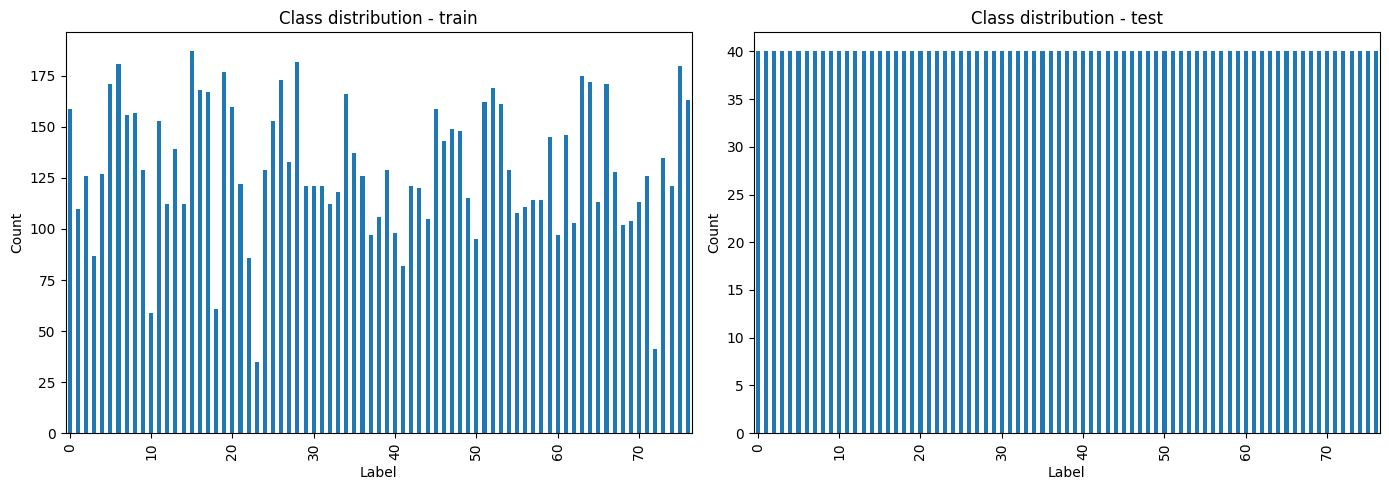

In [68]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
train_counts = df_train['label'].value_counts().sort_index()
ax1 = train_counts.plot(kind='bar')
plt.title("Class distribution - train")
plt.xlabel("Label")
plt.ylabel("Count")

ticks = range(0, len(train_counts), 10)
ax1.set_xticks(ticks)
ax1.set_xticklabels(train_counts.index[ticks])

plt.subplot(1, 2, 2)
test_counts = df_test['label'].value_counts().sort_index()
ax2 = test_counts.plot(kind='bar')
plt.title("Class distribution - test")
plt.xlabel("Label")
plt.ylabel("Count")

ticks = range(0, len(test_counts), 10)
ax2.set_xticks(ticks)
ax2.set_xticklabels(test_counts.index[ticks])

plt.tight_layout()
plt.show()

### 2. Use CleanLab to detect and fix data quality issues:
   - use `all-MiniLM-L6-v2` Sentence Transformer embeddings + logistic regression as the model
   - note that `LogisticRegressionCV` works out-of-the-box for multiclass classification, and
     you should use `class_weight="balanced"` in case of class imbalance
   - detect and fix: label issues, near duplicates, outliers
   - when analyzing duplicates, you can print rows at given indices with `.iloc[]`
   - comment:
     - do your results agree with [the paper](https://aclanthology.org/2022.insights-1.19/)
       pointing out the label quality issues?
     - are the problems severe and worth fixing in your opinion?

In [69]:

from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_predict

from cleanlab import Datalab

In [70]:
import joblib
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict


def get_initial_model_data(texts: np.ndarray, labels: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    model_name = "sentence-transformers/all-MiniLM-L6-v2"
    st_model = SentenceTransformer(model_name)

    embeddings = st_model.encode(
        texts.tolist(),
        show_progress_bar=True
    )

    clf = LogisticRegression(
        max_iter=1000,
        n_jobs=-1,
        class_weight="balanced"
    )

    pred_probs = cross_val_predict(
        clf,
        embeddings,
        labels,
        cv=5,
        method="predict_proba",
        n_jobs=-1
    )

    return embeddings, pred_probs

In [71]:
texts = df_train["text"].values
labels = df_train["label"].values

embeddings, pred_probs = get_initial_model_data(texts, labels)

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [72]:
from cleanlab import Datalab


data_dict = {"texts": texts, "labels": labels}
lab = Datalab(data_dict, label_name="labels", task="classification")
lab.find_issues(pred_probs=pred_probs, features=embeddings)
lab.report()

Finding null issues ...
Finding label issues ...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Finding outlier issues ...
Finding near_duplicate issues ...
Finding non_iid issues ...
Finding class_imbalance issues ...
Finding underperforming_group issues ...

Audit complete. 648 issues found in the dataset.
Dataset Information: num_examples: 10003, num_classes: 77

Here is a summary of various issues found in your data:

    issue_type  num_issues
near_duplicate         350
         label         166
       outlier         131
       non_iid           1

Learn about each issue: https://docs.cleanlab.ai/stable/cleanlab/datalab/guide/issue_type_description.html
See which examples in your dataset exhibit each issue via: `datalab.get_issues(<ISSUE_NAME>)`

Data indices corresponding to top examples of each issue are shown below.


------------------ near_duplicate issues -------------------

About this issue:
	A (near) duplicate issue refers to two or more examples in
    a dataset that are extremely similar to each other, relative
    to the rest of the dataset.  The examples flagg

#### near_duplicates issues

In [73]:
duplicate_issues = lab.get_issues("near_duplicate")
duplicate_issues = duplicate_issues[duplicate_issues["is_near_duplicate_issue"]]
duplicate_issues = duplicate_issues.sort_values(by="near_duplicate_score")

In [74]:
duplicate_issues.head(10)

,is_near_duplicate_issue,near_duplicate_score,near_duplicate_sets,distance_to_nearest_neighbor
1724,True,0.0,[1710],0.0
1246,True,0.0,[1290],0.0
6910,True,0.0,[6965],0.0
1290,True,0.0,[1246],0.0
5922,True,0.0,"[5930, 5921]",0.0
6965,True,0.0,[6910],0.0
5930,True,0.0,"[5922, 5921]",0.0
4595,True,0.0,[4594],0.0
4915,True,0.0,"[4903, 4839]",0.0
4903,True,0.0,"[4915, 4839]",0.0


In [75]:
for idx, row in duplicate_issues.head(10).iterrows():
    text = texts[idx]
    neighbors = texts[row["near_duplicate_sets"][:3]]
    print(f"Text: {text}")
    print(f"\tDuplicates: {neighbors}")
    print()

Text: I put the wrong pin too many times and now it is blocked. Can you help me unblock it?
	Duplicates: ['I put the wrong pin too many times and now it is blocked. Can you help me unblock it?']

Text: I can't seem to be able to use my card
	Duplicates: ["I can't seem to be able to use my card"]

Text: Do I need to go to a physical bank to change my PIN?
	Duplicates: ['Do I need to go to a physical bank to change my PIN?']

Text: I can't seem to be able to use my card
	Duplicates: ["I can't seem to be able to use my card"]

Text: Why do you keep declining my payment? I tried several times already with this card and it is just not working.
	Duplicates: ['Why do you keep declining my payment?I tried several times already with this card and it is just not working.'
 'Why do you keep declining my payment?I tried several times with this card and it is just not working.']

Text: Do I need to go to a physical bank to change my PIN?
	Duplicates: ['Do I need to go to a physical bank to change m

In [76]:
for idx, row in duplicate_issues.tail(10).iterrows():
    text = texts[idx]
    neighbors = texts[row["near_duplicate_sets"][:3]]
    print(f"Text: {text}")
    print(f"\tDuplicates: {neighbors}")
    print()

Text: What do I do if I can't prove my identity?
	Duplicates: ["What should I do if I can't prove my identity."]

Text: How can I receive a virtual card?
	Duplicates: ['How do I receive a virtual card?']

Text: How do I receive a virtual card?
	Duplicates: ['How can I receive a virtual card?']

Text: Can you please tell me why my transfer failed?
	Duplicates: ['Can you please explain why my transfer failed?']

Text: Can you please explain why my transfer failed?
	Duplicates: ['Can you please tell me why my transfer failed?']

Text: Is there a limit to using a disposable virtual card?
	Duplicates: ['Is there a limit to a disposable virtual card?']

Text: Is there a limit to a disposable virtual card?
	Duplicates: ['Is there a limit to using a disposable virtual card?']

Text: Can I top up any amount?
	Duplicates: ['Can I top-up any amount?']

Text: Can I top-up any amount?
	Duplicates: ['Can I top up any amount?']

Text: How long will a transfer from the US take?
	Duplicates: ['How long

In [77]:
dup_idx = [1724, 1246, 1290]
df_train.iloc[dup_idx]

,text,label,text_length
1724,I put the wrong pin too many times and now it ...,49,85
1246,I can't seem to be able to use my card,14,38
1290,I can't seem to be able to use my card,14,42


In [78]:
df_train["text_lower"] = df_train["text"].str.lower()
df_deduplicated = df_train.drop_duplicates(subset="text_lower")
df_deduplicated = df_deduplicated.drop(columns="text_lower")
df_deduplicated = df_deduplicated.reset_index(drop=True)
df_deduplicated

,text,label,text_length
0,I am still waiting on my card?,11,30
1,What can I do if my card still hasn't arrived ...,11,60
2,I have been waiting over a week. Is the card s...,11,58
3,Can I track my card while it is in the process...,11,59
4,"How do I know if I will get my card, or if it ...",11,54
...,...,...,...
9994,You provide support in what countries?,24,38
9995,What countries are you supporting?,24,34
9996,What countries are getting support?,24,35
9997,Are cards available in the EU?,24,30


#### label issues

In [79]:
label_issues = lab.get_issues("label")
label_issues = label_issues[label_issues["is_label_issue"]]
label_issues = label_issues.sort_values(by="label_score")

top_label_issues_y_true = label_issues.head(10)["given_label"]
top_label_issues_y_pred = label_issues.head(10)["predicted_label"]
top_label_issues_idxs = label_issues.head(10).index
top_label_issues_texts = texts[top_label_issues_idxs]

print("Top 10 label issues")
for text, y_true, y_pred in zip(top_label_issues_texts, top_label_issues_y_true, top_label_issues_y_pred):
    print(f"y_true {y_true}, y_pred {y_pred}, text: {text}")
    print()

Top 10 label issues
y_true 47, y_pred 62, text: i put money on my card and i dont see it on the balance

y_true 29, y_pred 40, text: i am not a premium customer but i want a virtual card, how do i get it

y_true 26, y_pred 14, text: Is my card actually working? It's the first time I tried using it

y_true 65, y_pred 62, text: How do I top up?

y_true 59, y_pred 25, text: My credit card transaction was declined for a loan payment.  Can you tell me why?

y_true 48, y_pred 5, text: I have not seen any changes in my account balance(s) after making a transfer.

y_true 41, y_pred 11, text: Can you tell me the status of my new card?

y_true 67, y_pred 5, text: I just did a transfer, but don't see the money in my account. What's up?

y_true 26, y_pred 49, text: my card was frozen due to putting in the wrong pin too much.  how many tries do i have

y_true 22, y_pred 41, text: How do I order a replacement for stolen card?



In [80]:
label_issues = label_issues[label_issues.index.isin(df_deduplicated.index)]

idxs = label_issues.index.tolist()
pred_labels = label_issues["predicted_label"]

df_fixed = df_deduplicated.copy()
df_fixed.loc[idxs, "label"] = pred_labels
df_fixed

,text,label,text_length
0,I am still waiting on my card?,11,30
1,What can I do if my card still hasn't arrived ...,11,60
2,I have been waiting over a week. Is the card s...,11,58
3,Can I track my card while it is in the process...,11,59
4,"How do I know if I will get my card, or if it ...",11,54
...,...,...,...
9994,You provide support in what countries?,24,38
9995,What countries are you supporting?,24,34
9996,What countries are getting support?,24,35
9997,Are cards available in the EU?,24,30


#### outliers issues

In [81]:
outlier_issues = lab.get_issues("outlier")

outlier_issues = outlier_issues[outlier_issues.index.isin(df_fixed.index)]

outlier_issues = outlier_issues[outlier_issues["is_outlier_issue"]]
outlier_issues = outlier_issues.sort_values(by="outlier_score", ascending=False)

texts_fixed = df_fixed["text"].values

top_outliers = outlier_issues.head(10)
top_outlier_idxs = top_outliers.index
top_outlier_texts = texts_fixed[top_outlier_idxs]
top_outlier_scores = top_outliers["outlier_score"]

print("Top 10 outlier samples:")
for text, score in zip(top_outlier_texts, top_outlier_scores):
    print(f"score = {score:.6f}")
    print(f"text  = {text}")
    print()

Top 10 outlier samples:
score = 0.075601
text  = I can't find my code

score = 0.075278
text  = cash and check deposit has not gone thru

score = 0.075155
text  = I was unable to activate my card.

score = 0.074852
text  = Can I use my account before the identity verification is complete?

score = 0.074240
text  = Is there a way to recover my password?

score = 0.073947
text  = Can I only top-up digitally? Or could I use cash?

score = 0.073933
text  = Would I be able to use SWIFT transfers?

score = 0.073648
text  = What do I have to do to get the contactless to work?

score = 0.073219
text  = How do I get refills to my card when I'm traveling?

score = 0.073199
text  = can the delivery be specific to my needs?



In [82]:
outlier_idxs_to_drop = outlier_issues.index   

df_clean = df_fixed.drop(index=outlier_idxs_to_drop).reset_index(drop=True)

print("Size before removing outliers:", df_fixed.shape)
print("Size after removing outliers:", df_clean.shape)


Size before removing outliers: (9999, 3)
Size after removing outliers: (9869, 3)


Comment: 
The CleanLab results are mostly consistent with what the paper reports – the Banking77 dataset really does contain a noticeable amount of label and data quality issues. In my case, CleanLab found about 6.5% of samples with some kind of problem (suspected label issues, near duplicates, or outliers), so the noise is not negligible.
On the other hand, the dataset is still relatively clean overall – the majority of examples look correct, and the problematic ones are a minority. In my opinion it is worth fixing/removing these cases (I applied deduplication, corrected labels suggested by CleanLab, and dropped some outliers), because with 77 classes even a few percent of bad labels can clearly hurt the classifier. However, it is not so bad that the dataset would be unusable or completely unreliable.

### 3. Train a small text classifier:
   - you can use `distilbert/distilbert-base-uncased` model, or any other that you want
   - make 80-20% train-valid split
   - use F1-score to select the best model
   - perform hyperparameter tuning, or use larger learning rate and train for longer than in
     the lab, since the dataset is small and task is harder
   - modify how `y_pred_proba` and `y_pred` are returned to accommodate multiclass classification,
     `np.argmax()` may be useful

In [89]:
import torch
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split


df_train, df_valid = train_test_split(
    df_fixed,
    test_size=0.2,         
    random_state=0,
    stratify=df_fixed["label"]
)

datasets_dict = DatasetDict()
datasets_dict["train"] = Dataset.from_pandas(df_train, split="train")
datasets_dict["valid"] = Dataset.from_pandas(df_valid, split="valid")
datasets_dict["test"]  = Dataset.from_pandas(df_test, split="test")

In [90]:
from transformers import AutoTokenizer


tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")


def tokenize(examples: dict) -> dict:
    encoded_examples = tokenizer(examples["text"], padding=True, truncation=True)
    encoded_examples["label"] = torch.tensor(examples["label"])
    return encoded_examples


num_cores = joblib.cpu_count(only_physical_cores=True)
datasets_tokenized = datasets_dict.map(tokenize, batched=True)

Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3080 [00:00<?, ? examples/s]

In [91]:
import os
import random
from sklearn.metrics import f1_score

from sklearn.metrics import matthews_corrcoef
from torch.nn.functional import softmax
from transformers import AutoModelForSequenceClassification, EvalPrediction, Trainer, TrainingArguments


# set determinism settings
os.environ["PYTHONHASHSEED"] = str(0)
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed_all(0)

model = AutoModelForSequenceClassification.from_pretrained("distilbert/distilbert-base-uncased", num_labels=77)


# freeze some weights to speed up training
#for param in model.distilbert.embeddings.parameters():
#    param.requires_grad = False

#for param in model.distilbert.transformer.parameters():
#    param.requires_grad = False


def compute_metrics(eval_pred: EvalPrediction) -> dict:
    y_true = eval_pred.label_ids
    logits = eval_pred.predictions            
    y_pred = logits.argmax(axis=1)             

    f1_macro = f1_score(y_true, y_pred, average="macro")
    return {"f1": f1_macro}


training_args = TrainingArguments(
    output_dir="finetuned_model",
    # change num_train_epochs depending on your hardware
    # if lower, increase learning rate and decrease save_steps and eval_steps
    learning_rate=2e-5,
    num_train_epochs=3,
    eval_strategy="steps",
    save_steps=50,
    eval_steps=50,
    save_total_limit=1,
    load_best_model_at_end=True,
    seed=0,
    metric_for_best_model="f1",
    data_seed=0,
    fp16=True,  # comment this out if you have unsupported hardware
    dataloader_num_workers=1,  # comment out if necessary
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=datasets_tokenized["train"],
    eval_dataset=datasets_tokenized["valid"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)
trainer.train()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Step,Training Loss,Validation Loss,F1
50,No log,4.303666,0.010305
100,No log,4.191164,0.084038
150,No log,4.014941,0.158857
200,No log,3.815747,0.234376
250,No log,3.612128,0.276982
300,No log,3.419109,0.373714
350,No log,3.231474,0.396631
400,No log,3.055085,0.381957
450,No log,2.892888,0.446796
500,3.673200,2.745839,0.451905


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

TrainOutput(global_step=3000, training_loss=1.6469017130533854, metrics={'train_runtime': 265.7499, 'train_samples_per_second': 90.299, 'train_steps_per_second': 11.289, 'total_flos': 527432400552366.0, 'train_loss': 1.6469017130533854, 'epoch': 3.0})

### 4. Test the resulting model:
   - check a few quality metrics
   - for multiclass metrics, use `average="macro"` (non-AUROC) or `multi_class="ovo"` (AUROC)
   - plot the F1-score for each class
   - comment:
     - is the overall F1-score comparable with the papers?
     - is it high enough from your perspective?
     - are there significant differences between classes?

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Precision (macro): 0.87
Recall (macro):    0.86
F1-score (macro):  0.86
AUROC (ovo, macro): 1.00
MCC: 0.86


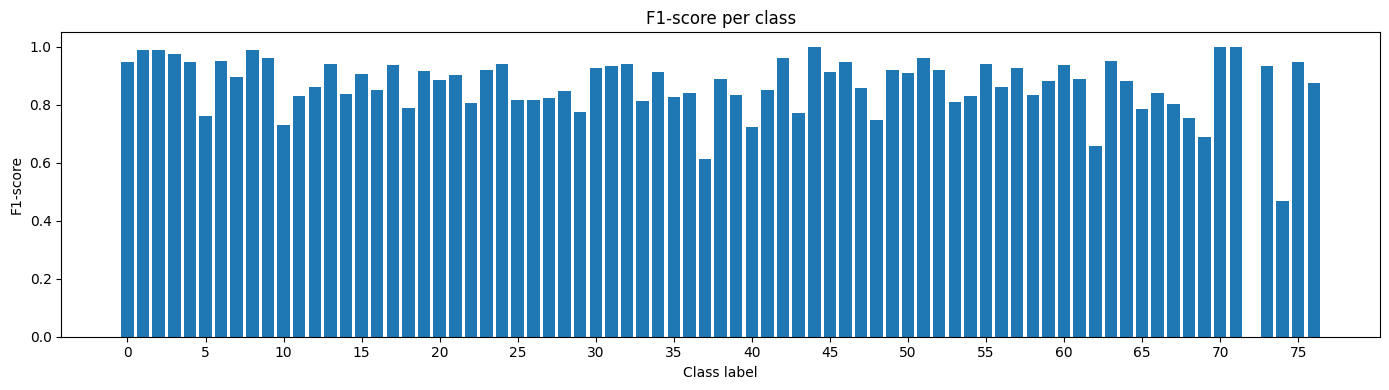

In [97]:
from sklearn.metrics import f1_score, matthews_corrcoef, precision_score, recall_score, roc_auc_score

y_test = datasets_tokenized["test"]["label"]

pred_output = trainer.predict(datasets_tokenized["test"])
logits = pred_output.predictions
probs = softmax(torch.from_numpy(logits), dim=1).numpy()

y_pred = probs.argmax(axis=1)
y_pred_proba = datasets_tokenized["test"]["label"]

print(f"Precision (macro): {precision_score(y_pred_proba, y_pred, average='macro'):.2f}")
print(f"Recall (macro):    {recall_score(y_pred_proba, y_pred, average='macro'):.2f}")
print(f"F1-score (macro):  {f1_score(y_pred_proba, y_pred, average='macro'):.2f}")

print(
    f"AUROC (ovo, macro): "
    f"{roc_auc_score(y_pred_proba, probs, multi_class='ovo', average='macro'):.2f}"
)

print(f"MCC: {matthews_corrcoef(y_pred_proba, y_pred):.2f}")




f1_per_class = f1_score(y_test, y_pred, average=None)  
num_classes = len(f1_per_class)

plt.figure(figsize=(14, 4))
plt.bar(range(num_classes), f1_per_class)
plt.xlabel("Class label")
plt.ylabel("F1-score")
plt.title("F1-score per class")
plt.xticks(
    ticks=range(0, num_classes, 5),  
    labels=range(0, num_classes, 5),
)
plt.tight_layout()
plt.show()

Comments: 
1. Is the overall F1-score comparable with the papers?
My macro F1 on the test set is about 0.86, which is close to the 0.88 F1 reported for standard models on the original BANKING77 dataset, but noticeably below the 0.92 F1 achieved by the best models on the cleaned / trimmed version of the data.  
  
2. Is it high enough from your perspective?  
For a small DistilBERT-based model trained in a simple way, 0.86 macro F1 over 77 intents is quite good and would be acceptable as a baseline. For a real banking assistant I would still aim for something closer to 0.9+ F1, so there is room for improvement (better tuning, larger model, more careful cleaning).  
  
3. Are there significant differences between classes?  
Yes. From the per-class F1 plot, most intents are in the 0.8–0.95 range, a few reach almost 1.0, but there are also several clearly worse classes (some < 0.7, one roughly around 0.5). This suggests that a handful of intents are much harder – probably because they are rare or very similar to other intents – and would benefit from extra data or better disambiguation.  


5. Use Giskard for behavioral testing:
   - modify `prediction_function()` appropriately
   - HuggingFace pipeline has `top_k=None` option to get scores for all labels, not just the label
     with the highest probability
   - analyze the results, are there any additional problems with the resulting classifier?

In [99]:
from giskard import Model as GiskardModel, Dataset as GiskardDataset, scan, testing
from transformers import pipeline

trained_model = trainer.model
trained_model.eval()

model_pipeline = pipeline(
    "text-classification", 
    model=trained_model, 
    tokenizer=tokenizer,
    device="cuda" if torch.cuda.is_available() else "cpu",
    top_k=None
)

id2label = trained_model.config.id2label     
num_labels = len(id2label)
label_ids = list(range(num_labels))      


@torch.no_grad()
def prediction_function(df: pd.DataFrame) -> np.ndarray:
    texts = df["text"].tolist()
    outputs = model_pipeline(texts)         

    all_probas = []
    for sample in outputs:
        scores_by_id = {}
        for item in sample:
            label_str = item["label"]
            label_id = int(''.join(ch for ch in label_str if ch.isdigit()))
            scores_by_id[label_id] = item["score"]

        probs_vec = [scores_by_id[i] for i in label_ids]
        all_probas.append(probs_vec)

    return np.array(all_probas, dtype=float)  # shape: (n_samples, 77)

giskard_dataset = GiskardDataset(df_test, target="label")

giskard_model = GiskardModel(
    model=prediction_function,
    model_type="classification",
    name="distilbert_banking77",
    classification_labels=label_ids,  
    feature_names=["text"],
)
scan_results = scan(giskard_model, giskard_dataset, verbose=False)

Device set to use cuda


2025-11-24 00:12:51,004 pid:7149 MainThread giskard.datasets.base INFO     Your 'pandas.DataFrame' is successfully wrapped by Giskard's 'Dataset' wrapper class.
2025-11-24 00:12:51,004 pid:7149 MainThread giskard.models.automodel INFO     Your 'prediction_function' is successfully wrapped by Giskard's 'PredictionFunctionModel' wrapper class.
2025-11-24 00:12:51,013 pid:7149 MainThread giskard.datasets.base INFO     Casting dataframe columns from {'text': 'object'} to {'text': 'object'}
2025-11-24 00:12:51,075 pid:7149 MainThread giskard.utils.logging_utils INFO     Predicted dataset with shape (10, 3) executed in 0:00:00.066749
2025-11-24 00:12:51,082 pid:7149 MainThread giskard.datasets.base INFO     Casting dataframe columns from {'text': 'object'} to {'text': 'object'}
2025-11-24 00:12:51,087 pid:7149 MainThread giskard.utils.logging_utils INFO     Predicted dataset with shape (1, 3) executed in 0:00:00.009476
2025-11-24 00:12:51,093 pid:7149 MainThread giskard.datasets.base INFO   

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


2025-11-24 00:12:59,194 pid:7149 MainThread giskard.utils.logging_utils INFO     Predicted dataset with shape (1, 3) executed in 0:00:00.006820
2025-11-24 00:12:59,196 pid:7149 MainThread giskard.datasets.base INFO     Casting dataframe columns from {'text': 'object'} to {'text': 'object'}
2025-11-24 00:12:59,201 pid:7149 MainThread giskard.utils.logging_utils INFO     Predicted dataset with shape (1, 3) executed in 0:00:00.005778
2025-11-24 00:12:59,204 pid:7149 MainThread giskard.datasets.base INFO     Casting dataframe columns from {'text': 'object'} to {'text': 'object'}
2025-11-24 00:12:59,209 pid:7149 MainThread giskard.utils.logging_utils INFO     Predicted dataset with shape (1, 3) executed in 0:00:00.005743
2025-11-24 00:12:59,212 pid:7149 MainThread giskard.datasets.base INFO     Casting dataframe columns from {'text': 'object'} to {'text': 'object'}
2025-11-24 00:12:59,218 pid:7149 MainThread giskard.utils.logging_utils INFO     Predicted dataset with shape (1, 3) executed i

In [100]:
display(scan_results)

<iframe id="scan-129290232718992" srcdoc="<!doctype html>
<html lang="en">

<head>
 <title>Giskard Scan Results</title>
 <base target="_blank">
 <meta charset="utf-8">
 
<style>pre code.hljs{display:block;overflow-x:auto;padding:1em}code.hljs{padding:3px 5px}
/*!
 Theme: GitHub Dark
 Description: Dark theme as seen on github.com
 Author: github.com
 Maintainer: @Hirse
 Updated: 2021-05-15

 Outdated base version: https://github.com/primer/github-syntax-dark
 Current colors taken from GitHub's CSS
*/.hljs{background:#0d1117;color:#c9d1d9}.hljs-doctag,.hljs-keyword,.hljs-meta .hljs-keyword,.hljs-template-tag,.hljs-template-variable,.hljs-type,.hljs-variable.language_{color:#ff7b72}.hljs-title,.hljs-title.class_,.hljs-title.class_.inherited__,.hljs-title.function_{color:#d2a8ff}.hljs-attr,.hljs-attribute,.hljs-literal,.hljs-meta,.hljs-number,.hljs-operator,.hljs-selector-attr,.hljs-selector-class,.hljs-selector-id,.hljs-variable{color:#79c0ff}.hljs-meta .hljs-string,.hljs-regexp,.hljs-string{color:#a5d6ff}.hljs-built_in,.hljs-symbol{color:#ffa657}.hljs-code,.hljs-comment,.hljs-formula{color:#8b949e}.hljs-name,.hljs-quote,.hljs-selector-pseudo,.hljs-selector-tag{color:#7ee787}.hljs-subst{color:#c9d1d9}.hljs-section{color:#1f6feb;font-weight:700}.hljs-bullet{color:#f2cc60}.hljs-emphasis{color:#c9d1d9;font-style:italic}.hljs-strong{color:#c9d1d9;font-weight:700}.hljs-addition{background-color:#033a16;color:#aff5b4}.hljs-deletion{background-color:#67060c;color:#ffdcd7}.hljs-copy-wrapper{overflow:hidden;position:relative}.hljs-copy-button:focus,.hljs-copy-wrapper:hover .hljs-copy-button{transform:translateX(0)}.hljs-copy-button{background-color:#2d2b57;background-color:var(--hljs-theme-background);background-image:url('data:image/svg+xml;charset=utf-8,<svg xmlns="http://www.w3.org/2000/svg" width="16" height="16" fill="none" viewBox="0 0 24 24"><path fill="%23fff" fill-rule="evenodd" d="M6 5a1 1 0 0 0-1 1v14a1 1 0 0 0 1 1h12a1 1 0 0 0 1-1V6a1 1 0 0 0-1-1h-2a1 1 0 1 1 0-2h2a3 3 0 0 1 3 3v14a3 3 0 0 1-3 3H6a3 3 0 0 1-3-3V6a3 3 0 0 1 3-3h2a1 1 0 0 1 0 2H6Z" clip-rule="evenodd"/><path fill="%23fff" fill-rule="evenodd" d="M7 3a2 2 0 0 1 2-2h6a2 2 0 0 1 2 2v2a2 2 0 0 1-2 2H9a2 2 0 0 1-2-2V3Zm8 0H9v2h6V3Z" clip-rule="evenodd"/></svg>');background-position:50%;background-repeat:no-repeat;border:1px solid #ffffff22;border-radius:.25rem;color:#fff;height:2rem;position:absolute;right:1em;text-indent:-9999px;top:1em;transition:background-color .2s ease,transform .2s ease-out;width:2rem}.hljs-copy-button:hover{border-color:#ffffff44}.hljs-copy-button:active{border-color:#ffffff66}.hljs-copy-button[data-copied=true]{background-image:none;text-indent:0;width:auto}@media (prefers-reduced-motion){.hljs-copy-button{transition:none}}.hljs-copy-alert{clip:rect(0 0 0 0);-webkit-clip-path:inset(50%);clip-path:inset(50%);height:1px;overflow:hidden;position:absolute;white-space:nowrap;width:1px}
/*! tailwindcss v3.3.2 | MIT License | https://tailwindcss.com*/*,:after,:before{border:0 solid #e5e7eb;box-sizing:border-box}:after,:before{--tw-content:""}html{-webkit-text-size-adjust:100%;font-feature-settings:normal;font-family:ui-sans-serif,system-ui,-apple-system,BlinkMacSystemFont,Segoe UI,Roboto,Helvetica Neue,Arial,Noto Sans,sans-serif,Apple Color Emoji,Segoe UI Emoji,Segoe UI Symbol,Noto Color Emoji;font-variation-settings:normal;line-height:1.5;-moz-tab-size:4;-o-tab-size:4;tab-size:4}body{line-height:inherit;margin:0}hr{border-top-width:1px;color:inherit;height:0}abbr:where([title]){-webkit-text-decoration:underline dotted;text-decoration:underline dotted}h1,h2,h3,h4,h5,h6{font-size:inherit;font-weight:inherit}a{color:inherit;text-decoration:inherit}b,strong{font-weight:bolder}code,kbd,pre,samp{font-family:ui-monospace,SFMono-Regular,Menlo,Monaco,Consolas,Liberation Mono,Courier New,monospace;font-size:1em}small{font-size:80%}sub,sup{font-size:75%;line-height:0;position:relative;vertical-align:baseline}sub{bottom:-.25em}sup{top:-.5em}table{border-collaps

In [101]:
test_suite = scan_results.generate_test_suite("My first test suite")
test_suite.run()

2025-11-24 00:14:53,316 pid:7149 MainThread giskard.datasets.base INFO     Casting dataframe columns from {'text': 'object'} to {'text': 'object'}
2025-11-24 00:14:53,319 pid:7149 MainThread giskard.utils.logging_utils INFO     Predicted dataset with shape (3080, 3) executed in 0:00:00.008760
2025-11-24 00:14:53,359 pid:7149 MainThread giskard.datasets.base INFO     Casting dataframe columns from {'text': 'object'} to {'text': 'object'}
2025-11-24 00:14:53,362 pid:7149 MainThread giskard.utils.logging_utils INFO     Predicted dataset with shape (3080, 3) executed in 0:00:00.012975
2025-11-24 00:14:53,367 pid:7149 MainThread giskard.utils.logging_utils INFO     Perturb and predict data executed in 0:00:00.059008
2025-11-24 00:14:53,367 pid:7149 MainThread giskard.utils.logging_utils INFO     Compare and predict the data executed in 0:00:00.000267
Executed 'Invariance to “Switch Gender”' with arguments {'model': <giskard.models.function.PredictionFunctionModel object at 0x759704d171d0>, 

<TestSuiteResult (failed)>

Comment: The tests show that our classifier is sensitive to gender and country changes, and not very robust to small typos. It also performs worse on queries containing “money” or “card”, where precision is below the desired threshold. So even though global metrics are high, there are still fairness and robustness issues that would need fixing before deployment.

6. Use Captum for local explainability:
   - modify the `explain_text` function from the lab to accommodate multiclass classification
   - explain predictions for a few samples from a test set
   - comment, is the model focusing on the right parts of texts?

In [102]:
from copy import deepcopy

from captum.attr import InputXGradient, configure_interpretable_embedding_layer
from captum.attr import visualization as vis


class BERTModelWrapper(torch.nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model

    def forward(self, inputs, attention_mask):
        return self.model(inputs, attention_mask=attention_mask)[0]


def explain_text(model, text: str, y_true: int) -> None:
    # make sure we compute gradients as necessary
    for param in model.distilbert.parameters():
        param.requires_grad = True
    
    tokenizer_output = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        return_attention_mask=True,
        return_tensors="pt",
    )
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    tokenizer_output = tokenizer_output.to(device)
    tokens = tokenizer.convert_ids_to_tokens(tokenizer_output["input_ids"][0])

    model_copy = deepcopy(model)
    interpretable_embedding_layer = configure_interpretable_embedding_layer(
        model_copy, "distilbert.embeddings"
    )
    input_embeddings = interpretable_embedding_layer.indices_to_embeddings(
        tokenizer_output["input_ids"]
    )

    model_wrapper = BERTModelWrapper(model_copy)
    input_x_gradient = InputXGradient(model_wrapper)
    attributions = input_x_gradient.attribute(
        input_embeddings,
        target=int(y_true),
        additional_forward_args=tokenizer_output["attention_mask"],
    )

    # mean normalization
    attributions = attributions.sum(dim=-1).squeeze(0)
    attributions = attributions / torch.norm(attributions)
    attributions = list([float(attr) for attr in attributions])
    
    with torch.no_grad():
        logits = model(**tokenizer_output).logits
        y_pred_proba = softmax(logits, dim=1)[0, 1].item()
        y_pred = int(y_pred_proba >= 0.5)

    # remove [CLS] and [SEP] tokens
    attributions = attributions[1:-1]
    tokens = tokens[1:-1]
    
    vis_record = vis.VisualizationDataRecord(
        word_attributions=attributions,
        pred_prob=y_pred_proba,
        pred_class=y_pred,
        true_class=y_true,
        attr_class=int(y_true), 
        attr_score=sum(attributions),
        raw_input_ids=tokens,
        convergence_score=0,
    )
    vis.visualize_text([vis_record])


In [103]:
samples = df_test.sample(6, random_state=0)  

for idx, row in samples.iterrows():
    print("\nIndex:", idx)
    print("True label:", row["label"])
    print("Text:", row["text"])
    explain_text(model, row["text"], int(row["label"]))


Index: 2000
True label: 70
Text: Can I verify the source of my funds?


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
70,0 (0.00),70,-1.03,can i verify the source of my funds ?



Index: 2668
True label: 59
Text: What's the deal? My card was just denied for top up. Why is it not going through?


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
59,0 (0.00),59,1.28,what ' s the deal ? my card was just denied for top up . why is it not going through ?



Index: 1998
True label: 63
Text: I made a payment that got charged twice instead of once.


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
63,0 (0.00),63,-0.64,i made a payment that got charged twice instead of once .



Index: 2465
True label: 58
Text: How can I top up with this cheque I got?


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
58,0 (0.00),58,-1.83,how can i top up with this che ##que i got ?



Index: 1051
True label: 6
Text: When I deposit cheques and cash, my balance does not update.


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
6,0 (0.00),6,-1.07,"when i deposit che ##ques and cash , my balance does not update ."



Index: 2060
True label: 67
Text: How long do I have to wait for a transfer from the US?


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
67,0 (0.00),67,-0.68,how long do i have to wait for a transfer from the us ?


Comment: Overall yes: in all inspected examples the model assigns the highest importance to semantically meaningful phrases that describe the user’s problem (card denied, transfer, balance not updating, etc.). There is some attribution on less informative tokens.